In [357]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 10

In [398]:
# contient les données de conso par heure et créé par node-red
# chaque entrée est la conso estimée qui est calculée pour 1 heure en kWh suivant la conso instantanée
# la moyenne de l'ensemble donne une idée de la conso théorique qui n'est pas réelle
# car la vrai consommation est le nombre d'entrées qui chacune représente 1 watt réellement consommé.

df = pd.read_csv(r"C:\Users\jean\Documents\interval&conso.txt", names=["interval","conso_h"])
df

interval  conso_h
0     27358     0.13
1     27549     0.13
2     27294     0.13

In [359]:
total_kwh = len(df)/1000   # chaque entrée est 1 watt consommé, la longueur donne le total de watts consommé
total_kwh

191.84

In [360]:
conso_moyen = df.conso_h.mean()
conso_moyen*1000        # en watt en moyenne sur la période

308.5224874895747

In [361]:
# calcul de la moyenne (cumul / nombre d'entrées)
df['cumul']=df['conso_h'].cumsum(axis=0)

In [362]:
# https://www.statology.org/cumulative-average-python/
df ['cumul_avg']=df['conso_h'].expanding().mean()

In [363]:
df


conso_h      cumul  cumul_avg
0         0.518      0.518   0.518000
1         0.156      0.674   0.337000
2         0.203      0.877   0.292333
3         0.153      1.030   0.257500
4         0.125      1.155   0.231000
...         ...        ...        ...
191835    0.200  59186.154   0.308525
191836    0.200  59186.354   0.308524
191837    0.200  59186.554   0.308524
191838    0.200  59186.754   0.308523
191839    0.200  59186.954   0.308522

[191840 rows x 3 columns]

In [364]:
df['conso_h'].sum()

59186.95400000001

In [365]:
df.cumul[390:400]

390    61.054
391    61.184
392    61.314
393    61.444
394    61.584
395    61.734
396    63.194
397    64.644
398    66.074
399    66.244
Name: cumul, dtype: float64

In [366]:
import math 
step = 1
x = []
y = []
ratio = []
for i,k in enumerate(df.cumul):    
    if math.floor(k)>= step:
        print(i,k,step)
        x.append(i)
        y.append(k)
        ratio.append(k/i)
        step+=1

3 1.03 1
11 2.1189999999999998 2
18 3.0679999999999996 3
24 4.300999999999999 4
29 5.151999999999998 5
33 6.019999999999998 6
40 7.0749999999999975 7
47 8.433999999999997 8
50 9.038999999999996 9
55 10.172999999999996 10
60 11.136999999999997 11
67 12.030999999999997 12
74 13.082999999999997 13
81 14.134999999999996 14
87 15.006999999999996 15
95 16.133999999999997 16
101 17.040999999999993 17
108 18.067999999999994 18
116 19.154999999999994 19
122 20.130999999999993 20
129 21.077999999999992 21
136 22.083999999999993 22
143 23.075999999999993 23
147 24.016999999999992 24
155 25.085999999999995 25
163 26.11399999999999 26
169 27.027999999999988 27
173 28.166999999999987 28
180 29.081999999999983 29
186 30.197999999999983 30
191 31.00499999999998 31
199 32.153999999999975 32
206 33.02599999999997 33
210 34.16299999999997 34
215 35.127999999999965 35
221 36.13599999999997 36
228 37.04899999999997 37
235 38.34099999999997 38
240 39.05199999999997 39
245 40.03299999999997 40
253 41.0709999

In [367]:
for i in range(len(x)):
    print(x[i],y[i],ratio[i])

3 1.03 0.3433333333333333
11 2.1189999999999998 0.1926363636363636
18 3.0679999999999996 0.17044444444444443
24 4.300999999999999 0.1792083333333333
29 5.151999999999998 0.17765517241379306
33 6.019999999999998 0.18242424242424235
40 7.0749999999999975 0.17687499999999995
47 8.433999999999997 0.17944680851063824
50 9.038999999999996 0.1807799999999999
55 10.172999999999996 0.1849636363636363
60 11.136999999999997 0.18561666666666662
67 12.030999999999997 0.17956716417910443
74 13.082999999999997 0.17679729729729726
81 14.134999999999996 0.17450617283950612
87 15.006999999999996 0.17249425287356318
95 16.133999999999997 0.1698315789473684
101 17.040999999999993 0.16872277227722765
108 18.067999999999994 0.16729629629629625
116 19.154999999999994 0.16512931034482753
122 20.130999999999993 0.16500819672131142
129 21.077999999999992 0.16339534883720924
136 22.083999999999993 0.16238235294117642
143 23.075999999999993 0.16137062937062932
147 24.016999999999992 0.16338095238095232
155 25.085

32065.053999995474 0.3127962267463538
102516 32066.08399999547 0.3127910179873919
102522 32067.153999995466 0.31278314898261317
102527 32068.20399999546 0.3127781364908313
102531 32069.043999995458 0.31277412684939637
102536 32070.093999995453 0.31276911523753076
102540 32071.18399999545 0.3127675443728833
102543 32072.023999995447 0.3127665857249685
102547 32073.143999995442 0.3127653076150004
102551 32074.263999995437 0.31276402960473754
102554 32075.093999995435 0.3127629736528603
102558 32076.203999995432 0.31276159831505523
102561 32077.013999995434 0.3127603475004674
102565 32078.003999995435 0.31275780236918477
102570 32079.013999995437 0.3127524032367694
102575 32080.01399999544 0.3127469071410718
102580 32081.013999995444 0.3127414115811605
102585 32082.033999995445 0.31273611151723396
102590 32083.073999995442 0.3127310069207081
102595 32084.123999995438 0.31272600029236747
102600 32085.163999995435 0.31272089668611536
102605 32086.183999995435 0.3127155986549918
102609 32087

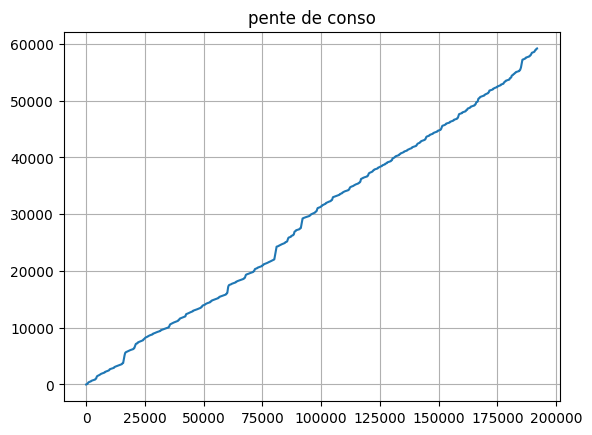

In [368]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('pente de conso')
plt.grid()

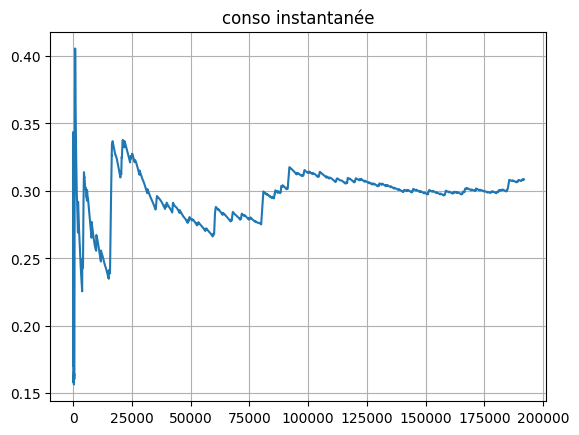

In [369]:
plt.plot(x,ratio)
plt.title('conso instantanée')
plt.grid()

(-9591.95, 201430.95, -0.065, 3.565)

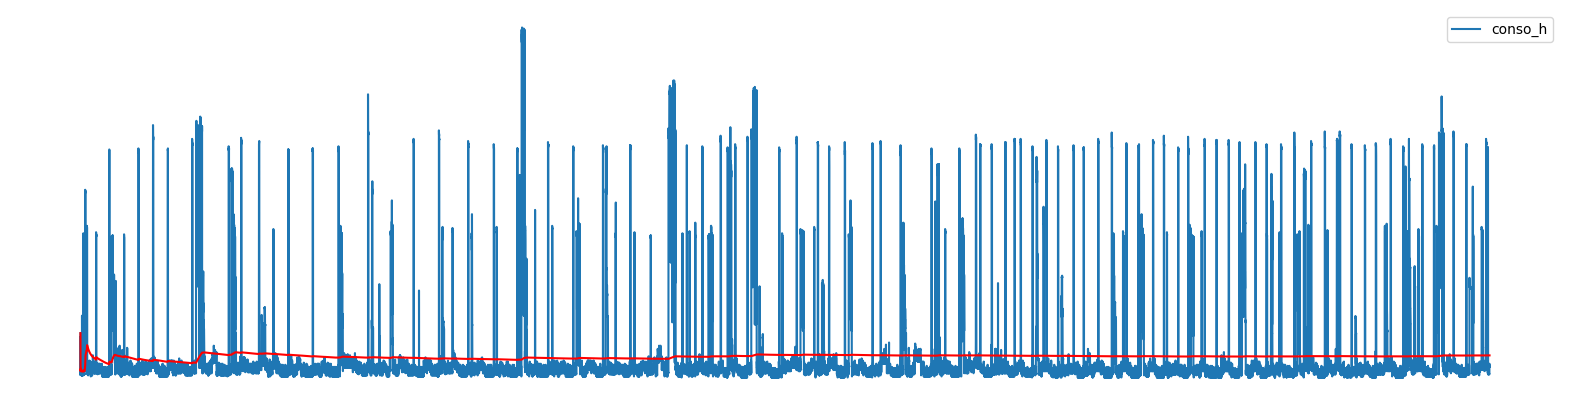

In [370]:
k=1
tail = k*1000
# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.plot.html
#df['conso_h'].tail(tail).plot.bar(figsize=(20,5),legend=True)
#df['conso_h'].plot.bar(figsize=(20,5),legend=True)
df['conso_h'].plot(figsize=(20,5),legend=True)

# https://stackoverflow.com/questions/47104862/pandas-dataframe-plot-colors-by-column-name
df['cumul_avg'].plot(color='#FF0000')  # red
plt.axis('off')


In [379]:
df.head(),len(df)

(   conso_h  cumul  cumul_avg       dates               hdates
 0    0.518  0.518   0.518000  1700196969  17/11/2023 05:56:09
 1    0.156  0.674   0.337000  1700196970  17/11/2023 05:56:10
 2    0.203  0.877   0.292333  1700196971  17/11/2023 05:56:11
 3    0.153  1.030   0.257500  1700196972  17/11/2023 05:56:12
 4    0.125  1.155   0.231000  1700196973  17/11/2023 05:56:13,
 191840)

In [372]:
import datetime as dt
from datetime import datetime
import pytz
def human_date(timestamp):
   return datetime.fromtimestamp(timestamp, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')

In [373]:
presentDate = datetime.now()
unix_timestamp = datetime.timestamp(presentDate)
unix_timestamp, human_date(unix_timestamp)

(1700388808.956476, '19/11/2023 11:13:28')

In [374]:
df['dates'] = [int(unix_timestamp)-d for d in df.index[::-1]]
df['hdates'] = list(map(human_date,df.dates))
df

conso_h      cumul  cumul_avg       dates               hdates
0         0.518      0.518   0.518000  1700196969  17/11/2023 05:56:09
1         0.156      0.674   0.337000  1700196970  17/11/2023 05:56:10
2         0.203      0.877   0.292333  1700196971  17/11/2023 05:56:11
3         0.153      1.030   0.257500  1700196972  17/11/2023 05:56:12
4         0.125      1.155   0.231000  1700196973  17/11/2023 05:56:13
...         ...        ...        ...         ...                  ...
191835    0.200  59186.154   0.308525  1700388804  19/11/2023 11:13:24
191836    0.200  59186.354   0.308524  1700388805  19/11/2023 11:13:25
191837    0.200  59186.554   0.308524  1700388806  19/11/2023 11:13:26
191838    0.200  59186.754   0.308523  1700388807  19/11/2023 11:13:27
191839    0.200  59186.954   0.308522  1700388808  19/11/2023 11:13:28

[191840 rows x 5 columns]

In [375]:
import numpy as np
ticks = np.arange(len(df)-tail,len(df),50)
x_ticks = df.loc[ticks].dates
h_ticks = df.loc[ticks].hdates


In [376]:
# fig, ax = plt.subplots()
# plt.plot(ticks,df['conso_h'].tail(tail))

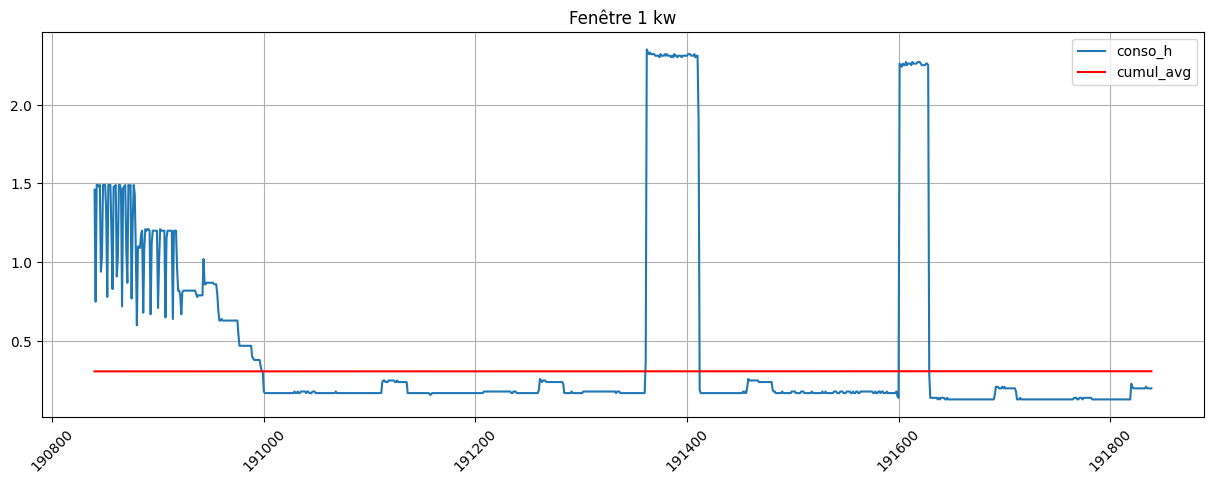

In [378]:
df['conso_h'].tail(tail).plot(figsize=(15,5),legend=True)
df['cumul_avg'].tail(tail).plot(color='red',grid=False, legend=True,rot=45)#,xticks=x_ticks)  # red

plt.title(f'Fenêtre {k} kw')
#plt.xticks(ticks, h_ticks)
plt.grid()

<AxesSubplot: ylabel='Frequency'>

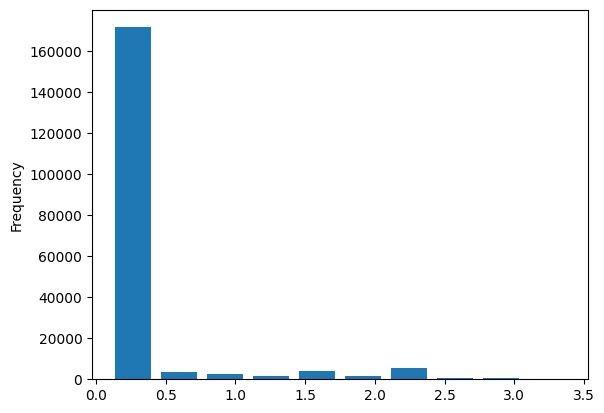

In [182]:
df['conso_h'].plot.hist(rwidth=0.8)